## Final Project Submission

Please fill out:
* Student name: Mawira Justin
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

The Scenario

The company you work for is interested in purchasing and operating airplanes for commercial and private enterprises, but know nothing about the potential risks of aircraft.
You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.

The Data

aviation accident data from 1962 to 2023 about civil aviation accidents 
up to you to decide:
-> what data to use
-> how to deal with missing values
-> how to aggregate (ie. sum, mean, median, count, max..) the data
-> how to visualize it in an interactive dashboard

The Expectation

make 3 recommendations for how the business should move forward
insights to help the head of the new aviation division decide which aircraft to purchase

You should make:

A non-technical presentation (ie. slides)
A Jupyter Notebook
A GitHub repository
An Interactive Dashboard (ie. tableau)

In [1]:
import pandas as pd

In [2]:
aviation_df = pd.read_csv('Aviation_Data.csv')
aviation_df

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [4]:
aviation_df.iloc[0:10, [14,15,23,24,25,27]]


,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Weather.Condition
0,Stinson,108-3,2.0,0.0,0.0,UNK
1,Piper,PA24-180,4.0,0.0,0.0,UNK
2,Cessna,172M,3.0,NaN,NaN,IMC
3,Rockwell,112,2.0,0.0,0.0,IMC
4,Cessna,501,1.0,2.0,NaN,VMC
5,Mcdonnell Douglas,DC9,NaN,NaN,1.0,VMC
6,Cessna,180,4.0,0.0,0.0,IMC
7,Cessna,140,0.0,0.0,0.0,VMC
8,Cessna,401B,0.0,0.0,0.0,IMC
9,North American,NAVION L-17B,0.0,0.0,3.0,IMC


In [5]:
aviation_df['Model'].value_counts().head(10)

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: Model, dtype: int64

new df with an aircraft column

In [6]:
aviation_df_copy = aviation_df.copy()

aviation_df_copy['Aircraft'] = aviation_df_copy['Make'] + ' ' + aviation_df_copy['Model']

In [7]:
aviation_df_copy['Aircraft'].value_counts()

Cessna 152                                 2168
Cessna 172                                 1254
Cessna 172N                                 996
Piper PA-28-140                             812
Cessna 150                                  716
                                           ... 
Bombardier, Inc. DHC-8-103                    1
Aerotrike DPS                                 1
BELL 412SP                                    1
EXTRA Flugzeugproduktions-GMBH EA-300/L       1
Rollins STARLITE                              1
Name: Aircraft, Length: 20130, dtype: int64

In [8]:
aviation_df_copy['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [9]:
aviation_df_copy['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [10]:
aviation_df_copy['Weather.Condition'] = aviation_df_copy['Weather.Condition'].str.upper()

In [11]:
weather_accidents = aviation_df_copy.loc[aviation_df_copy['Investigation.Type'] == 'Accident', 'Weather.Condition'].value_counts()
weather_accidents

VMC    75186
IMC     5725
UNK      971
Name: Weather.Condition, dtype: int64

In [12]:
aviation_df_copy['Total.Fatal.Injuries'].isnull().sum()


12860

making the case uniform

In [13]:
aviation_df_copy['Make'] = aviation_df_copy['Make'].str.upper()
aviation_df_copy['Model'] = aviation_df_copy['Model'].str.upper()
aviation_df_copy['Aircraft'] = aviation_df_copy['Aircraft'].str.upper()

In [14]:
aviation_df_copy['Model.Count'] = aviation_df_copy['Model'].map(aviation_df_copy['Model'].value_counts())


will impute injury/fatality NaNs with 0

In [15]:
aviation_df_copy['Total.Fatal.Injuries'] = aviation_df_copy['Total.Fatal.Injuries'].fillna(0)
aviation_df_copy['Total.Serious.Injuries'] = aviation_df_copy['Total.Fatal.Injuries'].fillna(0)
aviation_df_copy['Total.Minor.Injuries'] = aviation_df_copy['Total.Minor.Injuries'].fillna(0)
aviation_df_copy['Total.Uninjured'] = aviation_df_copy['Total.Uninjured'].fillna(0)


now confirming the clean

In [16]:
aviation_df_copy['Total.Fatal.Injuries'].isnull().sum()


0

In [17]:
aviation_df_copy['Total.Serious.Injuries'].isnull().sum()


0

In [19]:
aviation_df_copy['Make'].value_counts()['BOEING']

2745

checking for a correlation with the weather

In [20]:
weather_accidents = aviation_df_copy.loc[aviation_df_copy['Investigation.Type'] == 'Accident', 'Weather.Condition'].value_counts()
weather_accidents_df = weather_accidents.reset_index(name='Accidents.by.Weather')
weather_accidents_df.rename(columns={'index': 'Weather.Condition'}, inplace=True)


weather_fatalities = aviation_df_copy.loc[aviation_df_copy['Investigation.Type'] == 'Accident'].groupby('Weather.Condition')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
weather_fatalities_df = weather_fatalities.reset_index(name='Fatalities.by.Weather')

In [21]:
weather_severity = weather_accidents_df.merge(weather_fatalities_df, on=['Weather.Condition'], how='inner')
weather_severity


,Weather.Condition,Accidents.by.Weather,Fatalities.by.Weather
0,VMC,75186,25540.0
1,IMC,5725,11823.0
2,UNK,971,2733.0


In [22]:
weather_severity['Weather.Fatality.Rate'] = weather_severity['Fatalities.by.Weather'] / weather_severity['Accidents.by.Weather']
weather_severity


,Weather.Condition,Accidents.by.Weather,Fatalities.by.Weather,Weather.Fatality.Rate
0,VMC,75186,25540.0,0.339691
1,IMC,5725,11823.0,2.065153
2,UNK,971,2733.0,2.814624


Text(0.5, 1.0, 'Accident Severity by Weather Condition')

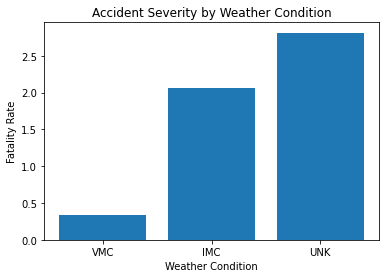

In [23]:
import matplotlib.pyplot as plt

plt.bar(weather_severity['Weather.Condition'], weather_severity['Weather.Fatality.Rate'])
plt.xlabel('Weather Condition')
plt.ylabel('Fatality Rate')
plt.title('Accident Severity by Weather Condition')


so despite vmc (Visual Meteorological Conditions) having the highest number of accidents and the highest number of fatalities in total, it's the weather condition with the lowest fatality rate. more planes just fly in vmc weather, and is relatively safer by accident

In [24]:
weather_severity.to_csv("weather_severity.csv", index=False)

creating some new dfs

In [25]:
records_df = (aviation_df_copy.groupby('Aircraft').size().reset_index(name='Total.Aircraft.Records').sort_values('Total.Aircraft.Records', ascending=False))


accidents_df = (aviation_df_copy[aviation_df_copy['Investigation.Type'] == 'Accident'].groupby('Aircraft').size().reset_index(name='Aircraft.Accidents')).sort_values('Aircraft.Accidents', ascending=False)


injuries = aviation_df_copy.groupby('Aircraft')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].sum()
injuries_df = injuries.reset_index()

make = aviation_df_copy.groupby('Aircraft')['Make'].first()
make_df = make.reset_index()


In [26]:
records_df

,Aircraft,Total.Aircraft.Records
4602,CESSNA 152,2366
4626,CESSNA 172,1753
4677,CESSNA 172N,1163
13422,PIPER PA-28-140,932
4575,CESSNA 150,829
...,...,...
7458,EUROCOPTER DEUTSCHLAND GMBH MBB BK-117 A4,1
7459,EUROCOPTER DEUTSCHLAND GMBH MBB-BK 117 C-1,1
7461,EUROCOPTER EC 130,1
7463,EUROCOPTER EC 130B4,1


merging the new dfs

In [27]:
merged_df = records_df.merge(accidents_df, on=['Aircraft'], how='inner')
merged_df = merged_df.merge(injuries_df, on=['Aircraft'], how='inner')
merged_df = merged_df.merge(make_df, on='Aircraft', how='inner')


In [28]:
merged_df.corr()

,Total.Aircraft.Records,Aircraft.Accidents,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Total.Aircraft.Records,1.000000,0.996470,0.538707,0.538707,0.826306,0.246882
Aircraft.Accidents,0.996470,1.000000,0.496322,0.496322,0.819837,0.174522
Total.Fatal.Injuries,0.538707,0.496322,1.000000,1.000000,0.523176,0.556604
Total.Serious.Injuries,0.538707,0.496322,1.000000,1.000000,0.523176,0.556604
Total.Minor.Injuries,0.826306,0.819837,0.523176,0.523176,1.000000,0.350558
Total.Uninjured,0.246882,0.174522,0.556604,0.556604,0.350558,1.000000


In [29]:
merged_df.sort_values('Total.Fatal.Injuries', ascending=False).head(10)

,Aircraft,Total.Aircraft.Records,Aircraft.Accidents,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make
16,BOEING 737,489,135,1348.0,1348.0,91.0,25441.0,BOEING
262,BOEING 737-200,53,35,906.0,906.0,70.0,2665.0,BOEING
2313,BOEING 777 - 206,3,3,534.0,534.0,0.0,0.0,BOEING
2,CESSNA 172N,1163,1160,428.0,428.0,341.0,1350.0,CESSNA
1217,BOEING MD-82,8,5,403.0,403.0,18.0,625.0,BOEING
1,CESSNA 172,1753,1744,398.0,398.0,391.0,2250.0,CESSNA
0,CESSNA 152,2366,2348,390.0,390.0,421.0,2364.0,CESSNA
589,AIRBUS A321,20,8,381.0,381.0,2.0,1349.0,AIRBUS
14,PIPER PA-28-181,529,525,380.0,380.0,184.0,643.0,PIPER
8115,TUPOLEV TU-154,1,1,349.0,349.0,0.0,0.0,TUPOLEV


safety depends more on severity of accidents, not frequency

can't compute accident probability bc the dataset doesn't provide total exposure/flights per aircraft, so safety perfomance in terms of accident severity is the only reliable measure for risk

In [30]:
# first commercial scale planes

In [31]:
merged_df['Avg.Uninjured.per.Accident'] = merged_df['Total.Uninjured'] / merged_df['Aircraft.Accidents']
# to then make sure the aircraft is large enough, instead of having 1 or 2 uninjured

size_cap = 100
n_min = 10

largecap_df = merged_df[
    (merged_df['Avg.Uninjured.per.Accident'] >= size_cap) &
    (merged_df['Aircraft.Accidents'] >= n_min)
].copy()


In [32]:
largecap_df['Mean.Fatalities.per.Accident'] = merged_df['Total.Fatal.Injuries'] / merged_df['Aircraft.Accidents']

In [33]:
largecap_df

,Aircraft,Total.Aircraft.Records,Aircraft.Accidents,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Avg.Uninjured.per.Accident,Mean.Fatalities.per.Accident
16,BOEING 737,489,135,1348.0,1348.0,91.0,25441.0,BOEING,188.451852,9.985185
148,BOEING 777,95,23,0.0,0.0,23.0,9419.0,BOEING,409.521739,0.000000
166,AIRBUS A320,85,16,283.0,283.0,13.0,3324.0,AIRBUS,207.750000,17.687500
168,BOEING 747,85,20,6.0,6.0,10.0,5032.0,BOEING,251.600000,0.300000
213,BOEING 767,68,29,128.0,128.0,30.0,6365.0,BOEING,219.482759,4.413793
242,BOEING 757,59,22,44.0,44.0,72.0,4978.0,BOEING,226.272727,2.000000
268,BOEING 737-300,51,29,167.0,167.0,109.0,4045.0,BOEING,139.482759,5.758621
306,BOEING 727-200,43,23,52.0,52.0,43.0,4364.0,BOEING,189.739130,2.260870
339,MCDONNELL DOUGLAS MD-11,39,22,5.0,5.0,388.0,3889.0,MCDONNELL DOUGLAS,176.772727,0.227273
355,MCDONNELL DOUGLAS DC-10-10,36,12,111.0,111.0,280.0,6248.0,MCDONNELL DOUGLAS,520.666667,9.250000


In [34]:
largecap_df.shape[0]


26

26 planes satisfy the criteria of:
1. enough accident history (at least 10) to avoid small sample bias 
2. commercial capacity

In [35]:
largecap_df.sort_values('Mean.Fatalities.per.Accident', ascending=True)

,Aircraft,Total.Aircraft.Records,Aircraft.Accidents,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Avg.Uninjured.per.Accident,Mean.Fatalities.per.Accident
519,BOEING 757-232,24,16,0.0,0.0,33.0,3647.0,BOEING,227.937500,0.000000
148,BOEING 777,95,23,0.0,0.0,23.0,9419.0,BOEING,409.521739,0.000000
621,BOEING 737-7H4,19,11,0.0,0.0,5.0,2207.0,BOEING,200.636364,0.000000
590,BOEING 717-200,20,10,0.0,0.0,25.0,1356.0,BOEING,135.600000,0.000000
703,BOEING 737 7H4,16,14,1.0,1.0,15.0,1704.0,BOEING,121.714286,0.071429
565,BOEING 757-222,21,12,1.0,1.0,2.0,2886.0,BOEING,240.500000,0.083333
555,MCDONNELL DOUGLAS MD-88,21,12,2.0,2.0,14.0,2143.0,MCDONNELL DOUGLAS,178.583333,0.166667
339,MCDONNELL DOUGLAS MD-11,39,22,5.0,5.0,388.0,3889.0,MCDONNELL DOUGLAS,176.772727,0.227273
168,BOEING 747,85,20,6.0,6.0,10.0,5032.0,BOEING,251.600000,0.300000
511,MCDONNELL DOUGLAS DC-10-30,24,13,20.0,20.0,106.0,5151.0,MCDONNELL DOUGLAS,396.230769,1.538462


Among commercially relevant aircraft with substantial accident history, the BOEING 777 exhibits the strongest safety performance in terms of accident severity, it has the most accident counts(23) of aircraft with 0 fatalities

followed by the BOEING 757-232


In [36]:
largecap_df[
    largecap_df['Mean.Fatalities.per.Accident'] == 0
].sort_values('Aircraft.Accidents', ascending=False)[
    ['Aircraft','Aircraft.Accidents']
]

,Aircraft,Aircraft.Accidents
148,BOEING 777,23
519,BOEING 757-232,16
621,BOEING 737-7H4,11
590,BOEING 717-200,10


In [37]:
largecap_df.to_csv("large_capacity.csv", index=False)

boeing 737 is an outlier 

it has several times more accidents and uninjured than the rest 

maybe it flew more hours or there's just more records for it

In [38]:
# now private planes

In [39]:
private_df = aviation_df_copy[
    aviation_df_copy['Purpose.of.flight'].isin([
        'Personal',
        'Instructional',
        'Business',
        'Executive/corporate'
    ])
].copy()

priv_records_df = private_df.groupby('Aircraft').size().reset_index(name='Total.Aircraft.Records').sort_values('Total.Aircraft.Records', ascending=False)


priv_acc_df = private_df[private_df['Investigation.Type'] == 'Accident'].groupby('Aircraft').size().reset_index(name='Aircraft.Accidents').sort_values('Aircraft.Accidents', ascending=False)


priv_injuries = private_df.groupby('Aircraft')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].sum()
priv_injuries_df = priv_injuries.reset_index()

priv_make = private_df.groupby('Aircraft')['Make'].first()
priv_make_df = priv_make.reset_index()

private_merged_df = (priv_records_df.merge(priv_acc_df, on='Aircraft', how='inner').merge(priv_injuries_df, on='Aircraft', how='inner').merge(priv_make_df, on='Aircraft', how='left'))



In [40]:
n_min = 10

private_merged_df = private_merged_df[
    private_merged_df['Aircraft.Accidents'] >= n_min
].copy()


In [41]:
private_merged_df.shape[0]


694

694 planes meet the criteria

In [42]:
private_merged_df['Make'].value_counts().head(10)


CESSNA       194
PIPER        136
BEECH         86
MAULE         17
MOONEY        15
BELLANCA      13
ROBINSON      12
BELL          11
GRUMMAN       10
SCHWEIZER     10
Name: Make, dtype: int64

cessna, piper and beech are the most frequent Make's

In [43]:
private_merged_df['Mean.Fatalities.per.Accident'] = (
    private_merged_df['Total.Fatal.Injuries'] /
    private_merged_df['Aircraft.Accidents']
)


In [44]:
private_merged_df.columns

Index(['Aircraft', 'Total.Aircraft.Records', 'Aircraft.Accidents',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Make',
       'Mean.Fatalities.per.Accident'],
      dtype='object')

In [45]:
private_merged_df.sort_values('Mean.Fatalities.per.Accident', ascending=True).head(20)


,Aircraft,Total.Aircraft.Records,Aircraft.Accidents,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Mean.Fatalities.per.Accident
658,MAULE MX-7-180,10,10,0.0,0.0,2.0,14.0,MAULE,0.0
661,PIPER PA-22/20,10,10,0.0,0.0,0.0,13.0,PIPER,0.0
660,MAULE M-7-235B,10,10,0.0,0.0,1.0,18.0,MAULE,0.0
610,DIAMOND AIRCRAFT IND INC DA 20 C1,11,11,0.0,0.0,0.0,16.0,DIAMOND AIRCRAFT IND INC,0.0
657,PIPER PA-18A 150,10,10,0.0,0.0,0.0,14.0,PIPER,0.0
655,PIPER PA-18-105,10,10,0.0,0.0,0.0,14.0,PIPER,0.0
533,BURKHART GROB G103,14,14,0.0,0.0,3.0,16.0,BURKHART GROB,0.0
643,NORTH AMERICAN AT-6G,11,11,0.0,0.0,3.0,15.0,NORTH AMERICAN,0.0
534,SCHWEIZER SGS 2-33,14,14,0.0,0.0,3.0,13.0,SCHWEIZER,0.0
401,EVEKTOR-AEROTECHNIK AS SPORTSTAR,21,21,0.0,0.0,2.0,25.0,EVEKTOR-AEROTECHNIK AS,0.0


top 20 strongest safety perfomance in terms of accident severity

In [46]:
private_merged_df['Total.Uninjured'].describe()


count     694.000000
mean       78.390490
std       168.714712
min         0.000000
25%        17.000000
50%        31.000000
75%        74.000000
max      2308.000000
Name: Total.Uninjured, dtype: float64

In [47]:
private_merged_df['Mean.Fatalities.per.Accident'].describe()

count    694.000000
mean       0.419584
std        0.358367
min        0.000000
25%        0.166667
50%        0.318759
75%        0.599123
max        2.700000
Name: Mean.Fatalities.per.Accident, dtype: float64

In [48]:
private_merged_df[private_merged_df['Total.Uninjured'] == 2308][['Aircraft', 'Aircraft.Accidents', 'Total.Fatal.Injuries', 'Make']]


,Aircraft,Aircraft.Accidents,Total.Fatal.Injuries,Make
0,CESSNA 152,2270,359.0,CESSNA


In [49]:
def classify_severity(x):
    if x < 1:  
        return 'Low'
    elif x < 2:  
        return 'Medium'
    else:  
        return 'High'

private_merged_df['Accident.Severity'] = private_merged_df['Mean.Fatalities.per.Accident'].apply(classify_severity)


In [50]:
private_merged_df['Accident.Severity'].value_counts()


Low       643
Medium     48
High        3
Name: Accident.Severity, dtype: int64

In [51]:
private_merged_df.sort_values('Aircraft.Accidents', ascending=False).head(10)

,Aircraft,Total.Aircraft.Records,Aircraft.Accidents,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Mean.Fatalities.per.Accident,Accident.Severity
0,CESSNA 152,2284,2270,359.0,359.0,412.0,2308.0,CESSNA,0.158150,Low
1,CESSNA 172,1581,1577,265.0,265.0,349.0,2112.0,CESSNA,0.168041,Low
2,CESSNA 172N,1094,1092,378.0,378.0,313.0,1297.0,CESSNA,0.346154,Low
3,PIPER PA-28-140,906,903,311.0,311.0,395.0,824.0,PIPER,0.344408,Low
4,CESSNA 150,767,760,97.0,97.0,190.0,727.0,CESSNA,0.127632,Low
5,CESSNA 172M,749,745,208.0,208.0,237.0,1040.0,CESSNA,0.279195,Low
6,CESSNA 172P,635,632,199.0,199.0,192.0,761.0,CESSNA,0.314873,Low
7,CESSNA 180,572,572,93.0,93.0,62.0,919.0,CESSNA,0.162587,Low
8,CESSNA 150M,562,560,99.0,99.0,139.0,551.0,CESSNA,0.176786,Low
9,PIPER PA-28-180,558,557,255.0,255.0,174.0,592.0,PIPER,0.457810,Low


cessna 152 is very much an outlier in terms of accident count, yet scores low on accident severity

In [52]:
private_merged_df.to_csv("private_capacity.csv", index=False)